# Ciência Dos Dados - Projeto 1


#### Gabriel Ligeiro - Turma 2A


## PERGUNTA: Como a renda per capta influência no acesso a Internet doméstica e a TV nas áreas rurais e urbanas no Brasil entre os anos de 2013 e 2015?

 ### Introdução: Compreender  



# DOM 2015

In [54]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import os


novo_dados = pd.read_csv("resumo2015.csv", sep= ',')
#tirando os null 
novo_dados = novo_dados[pd.notnull(novo_dados.UF)&pd.notnull(novo_dados.V0227)]
#criando o DataFrame
novo_dados = pd.DataFrame(novo_dados)
#mudando os nomes das colunas
novo_dados.columns = ["Nº","UF", "PB","COR","Internet","RendaperCap", "Area"]
#Criando Categorias
novo_dados.UF = novo_dados.UF.astype('category')
novo_dados.PB = novo_dados.PB.astype('category')
novo_dados.COR = novo_dados.COR.astype('category')
novo_dados.Internet = novo_dados.Internet.astype('category')
novo_dados.Area = novo_dados.Area.astype('category')
novo_dados.RendaperCap = novo_dados.RendaperCap.astype('float')
#tirar o valor absurdo de 99999999 da renda per cap
novo_dados = novo_dados[novo_dados.RendaperCap != 999999999999]

#mudando rotulos categoricos
novo_dados.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")
novo_dados.PB.cat.categories = ("Sim","Não")
novo_dados.COR.cat.categories = ("Sim")
novo_dados.Internet.cat.categories = ("Sim", "Não")
novo_dados.Area.cat.categories = ["Urbana1","Urbana2","Urbana3","Rural1","Rural2","Rural3","Rural4","Rural5"]

#criando nova coluna de Area

novo_dados.loc[(novo_dados.Area == "Urbana1") | (novo_dados.Area == "Urbana2")| \
(novo_dados.Area == "Urbana3"), "Area_Nova"] = "Urbana" 
novo_dados.loc[(novo_dados.Area == "Rural1") | (novo_dados.Area == "Rural2")| \
(novo_dados.Area == "Rural3")| (novo_dados.Area == "Rural4")| (novo_dados.Area == "Rural5"), "Area_Nova"] = "Rural" 


#criando nova coluna de TV
novo_dados.loc[(novo_dados.PB == "Sim"), "TV"] = "Sim"
novo_dados.loc[(novo_dados.PB == "Não"), "TV"] = "Não"
novo_dados.loc[(novo_dados.COR == "Sim"), "TV"] = "Sim"
novo_dados.loc[(novo_dados.COR == "Não"), "TV"] = "Não"
#criando nova coluna de TV
"""
Classes Sociais segundo IBGE
A --  > 20 SM
B -- 10 a 20 SM
C -- 4 a 10 
D -- 2 a 4 SM
E -- < 2SM

"""
sm = 788
novo_dados.loc[(novo_dados.RendaperCap < 2*sm ), "Classe"] = "E"
novo_dados.loc[(novo_dados.RendaperCap > 2*sm) & (novo_dados.RendaperCap < 4*sm), "Classe"] = "D"
novo_dados.loc[(novo_dados.RendaperCap > 4*sm) & (novo_dados.RendaperCap < 10*sm), "Classe"] = "C"
novo_dados.loc[(novo_dados.RendaperCap > 10*sm) & (novo_dados.RendaperCap < 20*sm), "Classe"] = "B"
novo_dados.loc[(novo_dados.RendaperCap > 20*sm), "Classe"] = "A"

#FAIXAS
faixa1 = range(0,5000,25)
faixa = [0,sm*2,4*sm,10*sm,20*sm]
#criando renda area urbana
rendaU = novo_dados.RendaperCap[novo_dados.Area_Nova == "Urbana"]
#criando renda area rural
rendaR = novo_dados.RendaperCap[novo_dados.Area_Nova == "Rural"]
#dividindo a area urbana em classes sociais 
rendaUfaixa = pd.cut(rendaU, faixa, False)
#dividindo a area rural em classes sociais 
rendaRfaixa = pd.cut(rendaR, faixa, False)

novo_dados.head()

,Nº,UF,PB,COR,Internet,RendaperCap,Area,Area_Nova,TV,Classe
2,2,Rondonia,Não,Sim,Sim,1150.0,Urbana1,Urbana,Sim,E
4,4,Rondonia,Não,Sim,Não,2900.0,Urbana1,Urbana,Sim,D
72,72,Rondonia,Não,Sim,Sim,590.0,Urbana1,Urbana,Sim,E
75,75,Rondonia,Sim,Sim,Não,1260.0,Urbana1,Urbana,Sim,E
83,83,Rondonia,Não,Sim,Não,863.0,Urbana1,Urbana,Sim,E



# DOM 2014

# DOM 2013

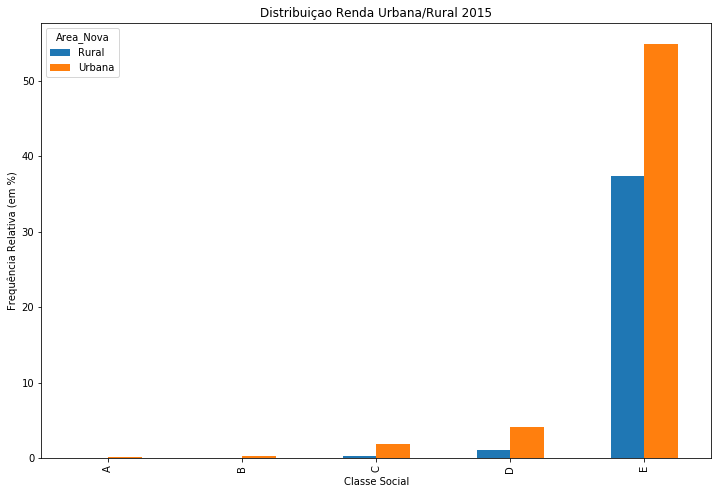

In [77]:
# grafico qualitativo renda urbana

grendaurbana = pd.crosstab(novo_dados.Classe,novo_dados.Area_Nova, normalize = True)*100
plot = grendaurbana.plot(kind="bar", figsize = (12,8), title = "Distribuiçao Renda Urbana/Rural 2015")

plt.ylabel('Frequência Relativa (em %)')
plt.xlabel('Classe Social')



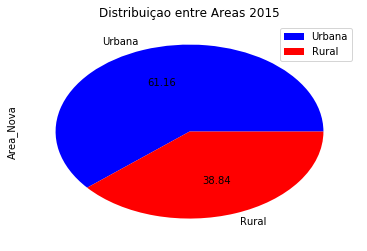

In [46]:
u = novo_dados.Area_Nova.value_counts(True)
u = u * 100
u.plot(kind='pie', colors=('blue', 'red'), title="Distribuiçao entre Areas 2015", autopct="%0.2f",legend=True)



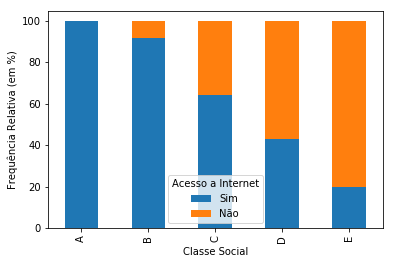

In [101]:
classe_int = pd.crosstab(novo_dados.Classe,novo_dados.Internet, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet'])*100
plot = classe_int.iloc[:-1,:].plot(kind="bar",stacked = True)
plt.ylabel('Frequência Relativa (em %)')
plot
#classe_int

urbana = novo_dados.Area_Nova=="urbana" 


In [48]:
#plot = rendaU.plot.hist(bins=faixa1, normed=True,figsize = (12,6),title = "Distribuiçao Renda Urbana")




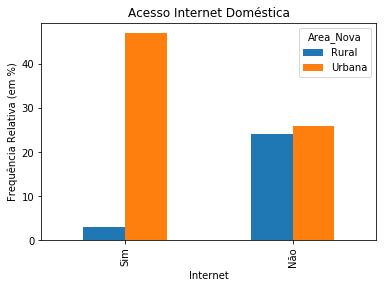

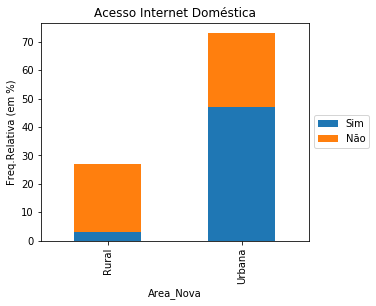

In [83]:
ct1 = pd.crosstab(novo_dados.Internet, novo_dados.Area_Nova, normalize = "index")
ct1 = (ct1/ct1.sum().sum()*100).round(decimals=0)
ct1.plot(kind="bar", title = "Acesso Internet Doméstica")
plt.ylabel('Frequência Relativa (em %)')

plot = ct1.T.plot(kind='bar', stacked=True,title='Acesso Internet Doméstica')
#plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

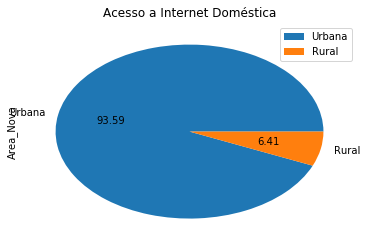

In [50]:
ct2 = novo_dados.Area_Nova[novo_dados.Internet == "Sim"].value_counts()
ct2.plot(kind='pie', title = "Acesso a Internet Doméstica", autopct="%.2f",legend=True)




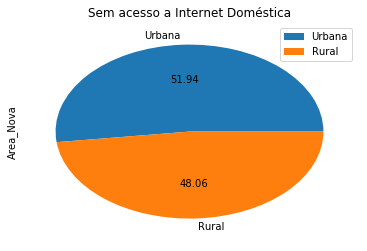

In [67]:
ct3 = novo_dados.Area_Nova[novo_dados.Internet == "Não"].value_counts()
ct3.plot(kind='pie', title = "Sem acesso a Internet Doméstica", autopct="%.2f",legend=True)


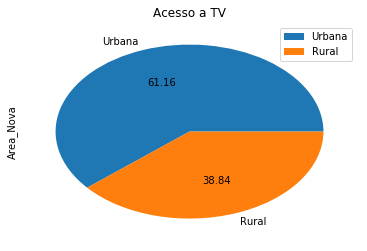

In [52]:
ct4 = novo_dados.Area_Nova[novo_dados.TV == "Sim"].value_counts()
ct4.plot(kind='pie', title = "Acesso a TV", autopct="%.2f",legend=True)

In [53]:
#ct5 = novo_dados.Area_Nova[novo_dados.TV == "Não"].value_counts()
#ct5.plot(kind='pie', title = "Não acesso a TV", autopct="%.2f",legend=True)
novo_dados.TV.value_counts()

Sim    3666
Name: TV, dtype: int64

In [45]:

novo_dados2 = pd.read_csv("resumo2013.csv", sep= ',')
#tirando os null 
novo_dados2 = novo_dados2[pd.notnull(novo_dados2.UF)&pd.notnull(novo_dados2.V0227)]
#criando o DataFrame
novo_dados2 = pd.DataFrame(novo_dados2)
#mudando os nomes das colunas
novo_dados2.columns = ["Nº","UF", "PB","COR","Internet","RendaperCap", "Area"]
#Criando Categorias
novo_dados2.UF = novo_dados2.UF.astype('category')
novo_dados2.PB = novo_dados2.PB.astype('category')
novo_dados2.COR = novo_dados2.COR.astype('category')
novo_dados2.Internet = novo_dados2.Internet.astype('category')
novo_dados2.Area = novo_dados2.Area.astype('category')
novo_dados2.RendaperCap = novo_dados2.RendaperCap.astype('float')
#tirar o valor absurdo de 99999999 da renda per cap
novo_dados2 = novo_dados2[novo_dados2.RendaperCap != 999999999999]

#mudando rotulos categoricos
novo_dados2.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")
novo_dados2.PB.cat.categories = ("Sim","Não")
novo_dados2.COR.cat.categories = ("Sim")
novo_dados2.Internet.cat.categories = ("Sim", "Não")
novo_dados2.Area.cat.categories = ["Urbana1","Urbana2","Urbana3","Rural1","Rural2","Rural3","Rural4","Rural5"]

#criando nova coluna de Area

novo_dados2.loc[(novo_dados2.Area == "Urbana1") | (novo_dados2.Area == "Urbana2")| \
(novo_dados2.Area == "Urbana3"), "Area_Nova"] = "Urbana" 
novo_dados2.loc[(novo_dados2.Area == "Rural1") | (novo_dados2.Area == "Rural2")| \
(novo_dados2.Area == "Rural3")| (novo_dados2.Area == "Rural4")| (novo_dados2.Area == "Rural5"), "Area_Nova"] = "Rural" 


#criando nova coluna de TV
novo_dados2.loc[(novo_dados2.PB == "Sim"), "TV"] = "Sim"
novo_dados2.loc[(novo_dados2.PB == "Não"), "TV"] = "Não"
novo_dados2.loc[(novo_dados2.COR == "Sim"), "TV"] = "Sim"
novo_dados2.loc[(novo_dados2.COR == "Não"), "TV"] = "Não"
#criando nova coluna de TV
"""
Classes Sociais segundo IBGE
A --  > 20 SM
B -- 10 a 20 SM
C -- 4 a 10 
D -- 2 a 4 SM
E -- < 2SM

"""
sm = 678
novo_dados2.loc[(novo_dados2.RendaperCap < 2*sm ), "Classe"] = "E"
novo_dados2.loc[(novo_dados2.RendaperCap > 2*sm) & (novo_dados2.RendaperCap < 4*sm), "Classe"] = "D"
novo_dados2.loc[(novo_dados2.RendaperCap > 4*sm) & (novo_dados2.RendaperCap < 10*sm), "Classe"] = "C"
novo_dados2.loc[(novo_dados2.RendaperCap > 10*sm) & (novo_dados2.RendaperCap < 20*sm), "Classe"] = "B"
novo_dados2.loc[(novo_dados2.RendaperCap > 20*sm), "Classe"] = "A"

#FAIXAS
faixa1 = range(0,5000,25)
faixa = [0,sm*2,4*sm,10*sm,20*sm]
#criando renda area urbana
rendaU = novo_dados2.RendaperCap[novo_dados2.Area_Nova == "Urbana"]
#criando renda area rural
rendaR = novo_dados2.RendaperCap[novo_dados2.Area_Nova == "Rural"]
#dividindo a area urbana em classes sociais 
rendaUfaixa = pd.cut(rendaU, faixa, False)
#dividindo a area rural em classes sociais 
rendaRfaixa = pd.cut(rendaR, faixa, False)



In [44]:

novo_dados1 = pd.read_csv("resumo2014.csv", sep= ',')
#tirando os null 
novo_dados1 = novo_dados1[pd.notnull(novo_dados1.UF)&pd.notnull(novo_dados1.V0227)]
#criando o DataFrame
novo_dados1 = pd.DataFrame(novo_dados1)
#mudando os nomes das colunas
novo_dados1.columns = ["Nº","UF", "PB","COR","Internet","RendaperCap", "Area"]
#Criando Categorias
novo_dados1.UF = novo_dados1.UF.astype('category')
novo_dados1.PB = novo_dados1.PB.astype('category')
novo_dados1.COR = novo_dados1.COR.astype('category')
novo_dados1.Internet = novo_dados1.Internet.astype('category')
novo_dados1.Area = novo_dados1.Area.astype('category')
novo_dados1.RendaperCap = novo_dados1.RendaperCap.astype('float')
#tirar o valor absurdo de 99999999 da renda per cap
novo_dados1 = novo_dados1[novo_dados1.RendaperCap != 999999999999]

#mudando rotulos categoricos
novo_dados1.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")
novo_dados1.PB.cat.categories = ("Sim","Não")
novo_dados1.COR.cat.categories = ("Sim")
novo_dados1.Internet.cat.categories = ("Sim", "Não")
novo_dados1.Area.cat.categories = ["Urbana1","Urbana2","Urbana3","Rural1","Rural2","Rural3","Rural4","Rural5"]

#criando nova coluna de Area

novo_dados1.loc[(novo_dados1.Area == "Urbana1") | (novo_dados1.Area == "Urbana2")| \
(novo_dados1.Area == "Urbana3"), "Area_Nova"] = "Urbana" 
novo_dados1.loc[(novo_dados1.Area == "Rural1") | (novo_dados1.Area == "Rural2")| \
(novo_dados1.Area == "Rural3")| (novo_dados1.Area == "Rural4")| (novo_dados1.Area == "Rural5"), "Area_Nova"] = "Rural" 


#criando nova coluna de TV
novo_dados1.loc[(novo_dados1.PB == "Sim"), "TV"] = "Sim"
novo_dados1.loc[(novo_dados1.PB == "Não"), "TV"] = "Não"
novo_dados1.loc[(novo_dados1.COR == "Sim"), "TV"] = "Sim"
novo_dados1.loc[(novo_dados1.COR == "Não"), "TV"] = "Não"
#criando nova coluna de TV
"""
Classes Sociais segundo IBGE
A --  > 20 SM
B -- 10 a 20 SM
C -- 4 a 10 
D -- 2 a 4 SM
E -- < 2SM

"""
sm = 724
novo_dados1.loc[(novo_dados1.RendaperCap < 2*sm ), "Classe"] = "E"
novo_dados1.loc[(novo_dados1.RendaperCap > 2*sm) & (novo_dados1.RendaperCap < 4*sm), "Classe"] = "D"
novo_dados1.loc[(novo_dados1.RendaperCap > 4*sm) & (novo_dados1.RendaperCap < 10*sm), "Classe"] = "C"
novo_dados1.loc[(novo_dados1.RendaperCap > 10*sm) & (novo_dados1.RendaperCap < 20*sm), "Classe"] = "B"
novo_dados1.loc[(novo_dados1.RendaperCap > 20*sm), "Classe"] = "A"

#FAIXAS
faixa1 = range(0,5000,25)
faixa = [0,sm*2,4*sm,10*sm,20*sm]
#criando renda area urbana
rendaU = novo_dados1.RendaperCap[novo_dados1.Area_Nova == "Urbana"]
#criando renda area rural
rendaR = novo_dados1.RendaperCap[novo_dados1.Area_Nova == "Rural"]
#dividindo a area urbana em classes sociais 
rendaUfaixa = pd.cut(rendaU, faixa, False)
#dividindo a area rural em classes sociais 
rendaRfaixa = pd.cut(rendaR, faixa, False)



